<a href="https://colab.research.google.com/github/pawel045/machine-learning-basics/blob/main/Titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data check
* read data
* data analysis with charts
* insights

In [313]:
data = pd.read_csv('titanic_data/train.csv')
data_test = pd.read_csv('titanic_data/test.csv')

In [314]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [315]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [316]:
data.groupby(['Sex'])['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [317]:
# percentage of death/alive
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

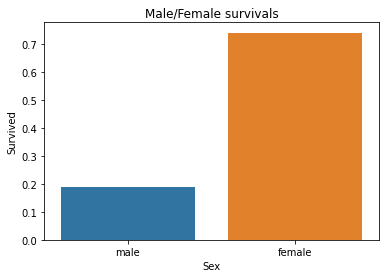

In [318]:
plt.title('Male/Female survivals')
ax = sns.barplot(x=data['Sex'], y=data['Survived'], ci=None)

In [319]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

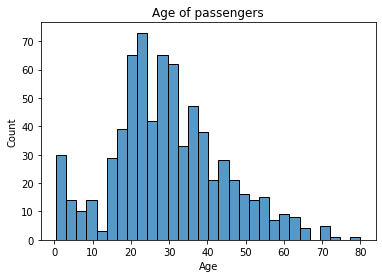

In [320]:
plt.title('Age of passengers')
sns.histplot(data['Age'].dropna(), bins=30)

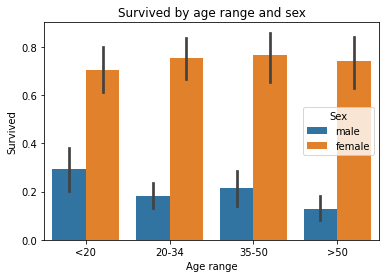

In [321]:
plt.title('Survived by age range and sex')
data['Age range'] = '>50'
data.loc[data['Age'] <= 50, 'Age range'] = '35-50'
data.loc[data['Age'] <= 34, 'Age range'] = '20-34'
data.loc[data['Age'] <= 19, 'Age range'] = '<20'

sns.barplot(x=data.sort_values(['Age'])['Age range'], y=data['Survived'], hue=data['Sex'])

In [322]:
data.groupby(['Sex', 'Pclass'])['Survived'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

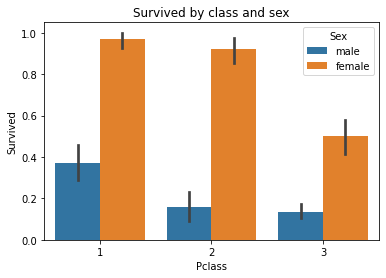

In [323]:
plt.title('Survived by class and sex')
sns.barplot(x=data['Pclass'], y=data['Survived'], hue=data['Sex'])

Insights:
* most of women survived
* passengers in higher class had more chance to survived
* the age of the passenger had little effect on survival rates

### Prepare data
* take only important columns
* generate missing values to empty records with SimpleImputer
* replace string to int (eg. man/women -> 0/1)
* scale values with StandardScaler (z = (x-u)/s)

In [324]:
important_columns = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
imputer = SimpleImputer(strategy='most_frequent')

data[important_columns] = imputer.fit_transform(data[important_columns])
data_test[important_columns] = imputer.transform(data_test[important_columns])

In [325]:
data['Sex'] = np.where(data['Sex'] == 'female', 1, 0)
data['Embarked'] = data['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

data_test['Sex'] = np.where(data_test['Sex'] == 'female', 1, 0)
data_test['Embarked'] = data_test['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [326]:
scaler = StandardScaler()

data[important_columns] = scaler.fit_transform(data[important_columns])
data_test[important_columns] = scaler.transform(data_test[important_columns])

### Create and train model (svc and kneighbours)
* split for train/test
* create model and fit
* print accuracy

In [327]:
x_data_train = data[important_columns]
y_data_train = data['Survived']
x_data_test = data_test[important_columns]

In [328]:
x_train, x_test, y_train, y_test = train_test_split(x_data_train, y_data_train)

In [329]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernel:
    model = SVC(kernel=ker)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy of prediction: {100*round(acc, 2)}, kernel: {ker}')

svc_model = SVC(kernel='rbf').fit(x_train, y_train)

Accuracy of prediction: 78.0, kernel: linear
Accuracy of prediction: 80.0, kernel: poly
Accuracy of prediction: 81.0, kernel: rbf
Accuracy of prediction: 65.0, kernel: sigmoid


In [330]:
for val in range(5,101, 10):
    model = KNeighborsClassifier(n_neighbors=val)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy of prediction: {100*round(acc, 2)}, neighbours: {val}')

kn_model = KNeighborsClassifier(n_neighbors=15).fit(x_train, y_train)

Accuracy of prediction: 82.0, neighbours: 5
Accuracy of prediction: 81.0, neighbours: 15
Accuracy of prediction: 78.0, neighbours: 25
Accuracy of prediction: 79.0, neighbours: 35
Accuracy of prediction: 78.0, neighbours: 45
Accuracy of prediction: 76.0, neighbours: 55
Accuracy of prediction: 74.0, neighbours: 65
Accuracy of prediction: 73.0, neighbours: 75
Accuracy of prediction: 73.0, neighbours: 85
Accuracy of prediction: 73.0, neighbours: 95


### Predict values
* use trained models to predict values
* save the results as csv
* what's happend if only women survived

In [331]:
svc_pred = svc_model.predict(x_data_test)
kn_pred = kn_model.predict(x_data_test)

svc_ans = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': svc_pred})
kn_ans = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': kn_pred})

svc_ans.to_csv('titanic_data/svc_ans.csv', index=False)
kn_ans.to_csv('titanic_data/kn_ans.csv', index=False)

In [332]:
# only women survived
my_pred_surv = np.where(x_data_test['Sex'] == 1, 1, 0)

my_pred = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': my_pred_surv})
my_pred.to_csv('titanic_data/my_pred.csv', index=False)

Text(0, 0.5, 'Score [%]')

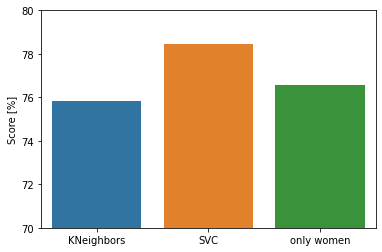

In [333]:
score = {'KNeighbors': 75.837, 'SVC': 78.468,'only women': 76.555}

sns.barplot(x=list(score.keys()), y=list(score.values()))
plt.ylim(70, 80)
plt.ylabel('Score [%]')